In [201]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
#Importing dataset
ipl_df = pd.read_csv('2innings.csv')
print(f"Dataset successfully Imported of Shape : {ipl_df.shape}")

Dataset successfully Imported of Shape : (77502, 12)


In [203]:
# First 5 Columns Data
ipl_df.head()

,innings,batting_team,bowling_team,over,ball,batsman_runs,extra_runs,total_runs,run_cum,total,run_last_5,overs
0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1,0,171,1,1.1
1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,0,0,171,1,1.2
2,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,0,0,171,1,1.3
3,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,2,2,171,3,1.4
4,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,4,6,171,7,1.5


In [204]:
# Describing the ipl_dfset
ipl_df.describe()

,innings,over,ball,batsman_runs,extra_runs,total_runs,run_cum,total,run_last_5,overs
count,77502.000000,77502.000000,77502.000000,77502.000000,77502.000000,77502.000000,77502.000000,77502.000000,77502.000000,77502.000000
mean,2.000723,9.881448,3.606875,1.248019,0.066321,1.314340,72.520670,152.138964,24.412273,10.242136
std,0.039669,5.562014,1.805686,1.611547,0.342119,1.610247,46.881303,29.160847,19.546753,5.562088
min,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,1.100000
25%,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,33.000000,134.000000,9.000000,5.400000
50%,2.000000,10.000000,4.000000,1.000000,0.000000,1.000000,69.000000,153.000000,21.000000,10.200000
75%,2.000000,15.000000,5.000000,1.000000,0.000000,1.000000,107.000000,172.000000,34.000000,15.100000
max,5.000000,20.000000,9.000000,7.000000,7.000000,10.000000,223.000000,223.000000,130.000000,20.800000


In [205]:
# Information about Each Column
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77502 entries, 0 to 77501
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   innings       77502 non-null  int64  
 1   batting_team  77502 non-null  object 
 2   bowling_team  77502 non-null  object 
 3   over          77502 non-null  int64  
 4   ball          77502 non-null  int64  
 5   batsman_runs  77502 non-null  int64  
 6   extra_runs    77502 non-null  int64  
 7   total_runs    77502 non-null  int64  
 8   run_cum       77502 non-null  int64  
 9   total         77502 non-null  int64  
 10  run_last_5    77502 non-null  int64  
 11  overs         77502 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 7.1+ MB


In [206]:
# Number of Unique Values in each column
ipl_df.nunique()

innings           4
batting_team     13
bowling_team     13
over             20
ball              9
batsman_runs      8
extra_runs        7
total_runs       10
run_cum         223
total           145
run_last_5      124
overs           176
dtype: int64

In [207]:
# ipl_df types of all Columns
ipl_df.dtypes

innings           int64
batting_team     object
bowling_team     object
over              int64
ball              int64
batsman_runs      int64
extra_runs        int64
total_runs        int64
run_cum           int64
total             int64
run_last_5        int64
overs           float64
dtype: object

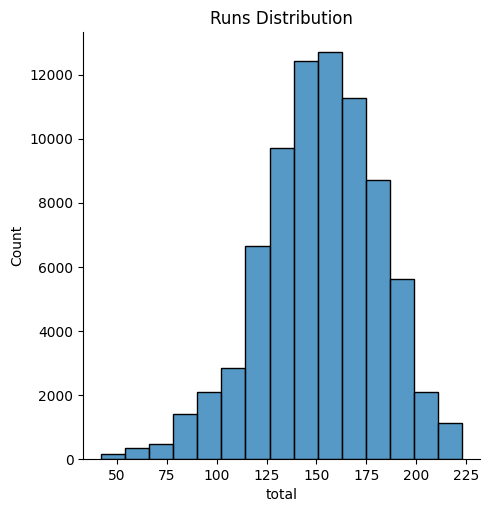

In [208]:
#Runs Distribution
sns.displot(ipl_df['total'],kde=False,bins=15)
plt.title("Runs Distribution")

plt.show()

**# Data Cleaning and Preprocessing**

In [209]:
# Names of all columns
ipl_df.columns

Index(['innings', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman_runs', 'extra_runs', 'total_runs', 'run_cum', 'total',
       'run_last_5', 'overs'],
      dtype='object')

So in our dataset  'innings','over','ball','extra_runs','batsman_runs' will not support or have low corelation So We exclude these columns 

In [210]:
irrelevant = ['innings','over','ball','extra_runs','batsman_runs']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (77502, 12)
After Removing Irrelevant Columns : (77502, 7)


,batting_team,bowling_team,total_runs,run_cum,total,run_last_5,overs
0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,171,1,1.1
1,Royal Challengers Bangalore,Sunrisers Hyderabad,0,0,171,1,1.2
2,Royal Challengers Bangalore,Sunrisers Hyderabad,0,0,171,1,1.3
3,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,171,3,1.4
4,Royal Challengers Bangalore,Sunrisers Hyderabad,4,6,171,7,1.5


In [211]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bangalore',
              'Delhi Capitals', 'Sunrisers Hyderabad','Lucknow Super Giants', 'Gujarat Titans' ]

In [212]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['batting_team'].isin(const_teams)) & (ipl_df['bowling_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams :{ipl_df['batting_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (77502, 7)
After Removing Irrelevant Columns : (68888, 7)
Consistent Teams :['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Delhi Capitals'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Punjab Kings' 'Gujarat Titans'
 'Rajasthan Royals' 'Chennai Super Kings']


,batting_team,bowling_team,total_runs,run_cum,total,run_last_5,overs
0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,171,1,1.1
1,Royal Challengers Bangalore,Sunrisers Hyderabad,0,0,171,1,1.2
2,Royal Challengers Bangalore,Sunrisers Hyderabad,0,0,171,1,1.3
3,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,171,3,1.4
4,Royal Challengers Bangalore,Sunrisers Hyderabad,4,6,171,7,1.5


#### Remove First 5 Overs of every match
# This code removes the first five overs from each innings and saves it as a new                                        

In [213]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

Before Removing Overs : (68888, 7)
After Removing Overs : (53759, 7)


,batting_team,bowling_team,total_runs,run_cum,total,run_last_5,overs
25,Royal Challengers Bangalore,Sunrisers Hyderabad,0,42,171,43,5.1
26,Royal Challengers Bangalore,Sunrisers Hyderabad,0,42,171,43,5.2
27,Royal Challengers Bangalore,Sunrisers Hyderabad,0,42,171,43,5.3
28,Royal Challengers Bangalore,Sunrisers Hyderabad,1,43,171,44,5.4
29,Royal Challengers Bangalore,Sunrisers Hyderabad,0,43,171,44,5.5


In [214]:
# Data Preprocessing and Encoding

In [215]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,batting_team,bowling_team,total_runs,run_cum,total,run_last_5,overs
25,7,9,0,42,171,43,5.1
26,7,9,0,42,171,43,5.2
27,7,9,0,42,171,43,5.3
28,7,9,1,43,171,44,5.4
29,7,9,0,43,171,44,5.5


In [216]:

from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [217]:
#ipl_df = np.array(columnTransformer.fit_transform(ipl_df))


Save the Numpy Array in a new DataFrame with transformed columns

In [218]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals', 'batting_team_Punjab Kings',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad', 
              'batting_team_Gujarat Titans', 'batting_team_Lucknow Super Giants',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Capitals', 'bowling_team_Punjab Kings',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'bowling_team_Gujarat Titans', 'bowling_team_Lucknow Super Giants', 'run_cum', 'overs',
       'run_last_5', 'total']


In [219]:
# Encoded Data
ipl_df.head()

,batting_team,bowling_team,total_runs,run_cum,total,run_last_5,overs
25,7,9,0,42,171,43,5.1
26,7,9,0,42,171,43,5.2
27,7,9,0,42,171,43,5.3
28,7,9,1,43,171,44,5.4
29,7,9,0,43,171,44,5.5


## Prepare Train and Test Data

In [220]:
features = ipl_df.drop(['total'], axis=1)
labels = ipl_df['total']

In [221]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (43007, 6)
Testing Set : (10752, 6)


In [222]:
## ML  Algorithms
models = dict()

In [223]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [224]:
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.76%
Test Score : 40.82%


In [225]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 11.909598214285714
Mean Squared Error (MSE): 477.42759486607144
Root Mean Squared Error (RMSE): 21.850116587013247


In [226]:

#### Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [227]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 43.06%
Test Score : 43.21%


In [228]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 15.883740917597121
Mean Squared Error (MSE): 458.1791439256181
Root Mean Squared Error (RMSE): 21.405119572794217


#### Random Forest Regression


In [229]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [230]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 95.29%
Test Score : 68.38%


In [231]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 11.124377713780826
Mean Squared Error (MSE): 255.0305976382401
Root Mean Squared Error (RMSE): 15.969677443149568


In [232]:
#### Support Vector Machine
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [233]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 38.10%
Test Score : 38.29%


In [234]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 16.824788680329934
Mean Squared Error (MSE): 497.81687925832387
Root Mean Squared Error (RMSE): 22.311810308854902


#### XGBoost

In [235]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [236]:
train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 64.34%
Test Score : 55.91%


In [237]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.989537100351992
Mean Squared Error (MSE): 355.65377111111
Root Mean Squared Error (RMSE): 18.858784985017195


In [238]:
#KNR
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [239]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 73.51%
Test Score : 57.64%


In [240]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 12.888802083333333
Mean Squared Error (MSE): 341.68661458333327
Root Mean Squared Error (RMSE): 18.484767095728667


Best Model

<BarContainer object of 6 artists>

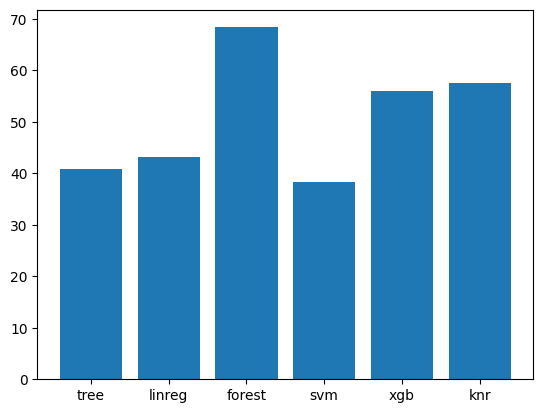

In [241]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **KNR**. So we will be choosing Random Forest for the final model

In [242]:
def winner_predict(batting_team, bowling_team, run_cum, overs, run_last_5, total ,model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif batting_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif batting_team == 'Gujarat Titans':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif batting_team == 'Lucknow Super Giants':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif bowling_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif bowling_team == 'Gujarat Titans':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif bowling_team == 'Lucknow Super Giants':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]

  prediction_array = prediction_array + [run_cum, overs, run_last_5,total]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))
 



In [252]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = winner_predict(batting_team, bowling_team, overs=10.5, run_cum=67, run_last_5=29,total=169)
print(f'Predicted Score : {score} || Actual Score : 146')
 


C:\Users\sujal\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 24 features, but RandomForestRegressor is expecting 6 features as input.